# 🚧 Traffic Accident Analysis (2016–2023)
# SkillCraft Technology - Task 04 by Jashanpreet Singh

# Analyze traffic accident data to identify patterns related to:
# - Road conditions
# - Weather conditions
# - Time of day
# Visualize:
# - Accident hotspots
# - Contributing factors using charts


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from folium.plugins import HeatMap
import warnings
warnings.filterwarnings('ignore')
sns.set(style="whitegrid")


In [2]:
# Load dataset 
df = pd.read_csv(r"C:\Users\Jashanpreet Singh\Desktop\SC_DS_4\US_Accidents_March23.csv")
df.shape

(7728394, 46)

In [3]:
# Keep only relevant columns
df = df[['ID', 'Severity', 'Start_Time', 'Start_Lat', 'Start_Lng', 
         'Weather_Condition', 'Visibility(mi)', 'State']]

# Drop rows with missing crucial data
df.dropna(subset=['Start_Time', 'Start_Lat', 'Start_Lng', 'Weather_Condition'], inplace=True)

# Convert Start_Time to datetime with a more flexible parser
# Using format='mixed' to handle different datetime formats in the data
df['Start_Time'] = pd.to_datetime(df['Start_Time'], format='mixed')

# Extract time components
df['Hour'] = df['Start_Time'].dt.hour
df['Weekday'] = df['Start_Time'].dt.day_name()
df['Month'] = df['Start_Time'].dt.month_name()

# Categorize Time of Day
def time_of_day(hour):
    if 5 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 17:
        return 'Afternoon'
    elif 17 <= hour < 21:
        return 'Evening'
    else:
        return 'Night'

df['Time_of_Day'] = df['Hour'].apply(time_of_day)


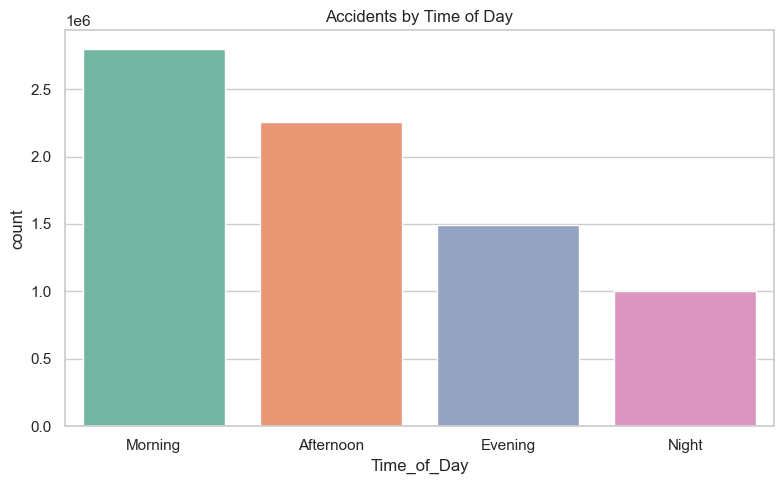

In [4]:
# Accidents by Time of Day
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='Time_of_Day', order=['Morning', 'Afternoon', 'Evening', 'Night'], palette='Set2')
plt.title('Accidents by Time of Day')
plt.tight_layout()

# Save the figure - modified for Jupyter Notebook environment
file_name = 'accidents_by_time_of_day.png'

plt.savefig(file_name, dpi=300, bbox_inches='tight')
plt.show()  # Display the plot after saving

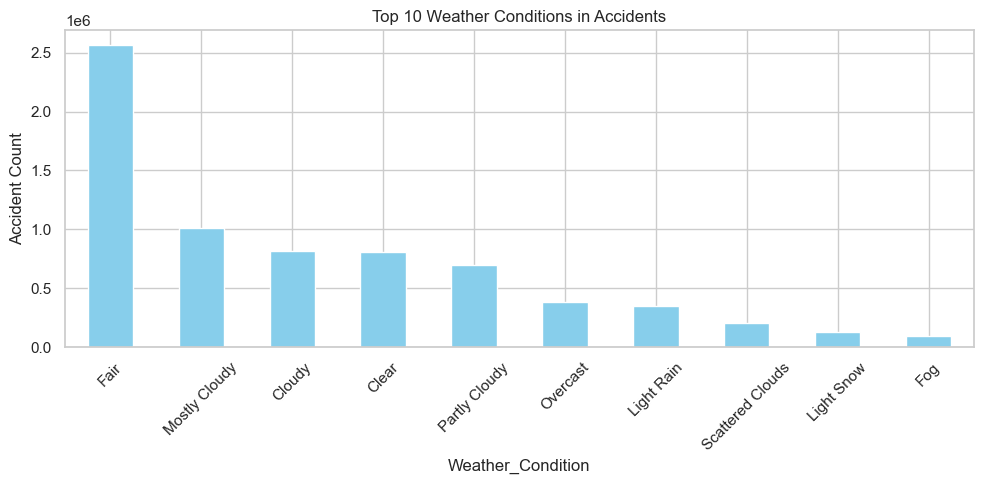

In [5]:
# Top 10 Weather Conditions
plt.figure(figsize=(10, 5))
df['Weather_Condition'].value_counts().head(10).plot(kind='bar', color='skyblue')
plt.title('Top 10 Weather Conditions in Accidents')
plt.ylabel('Accident Count')
plt.xticks(rotation=45)
plt.tight_layout()

# Save the figure - modified for Jupyter Notebook environment
file_name = 'top_10_weather_conditions.png'
# Simply save in the current working directory instead of using __file__
plt.savefig(file_name, dpi=300, bbox_inches='tight')
plt.show()  # Display the plot after saving

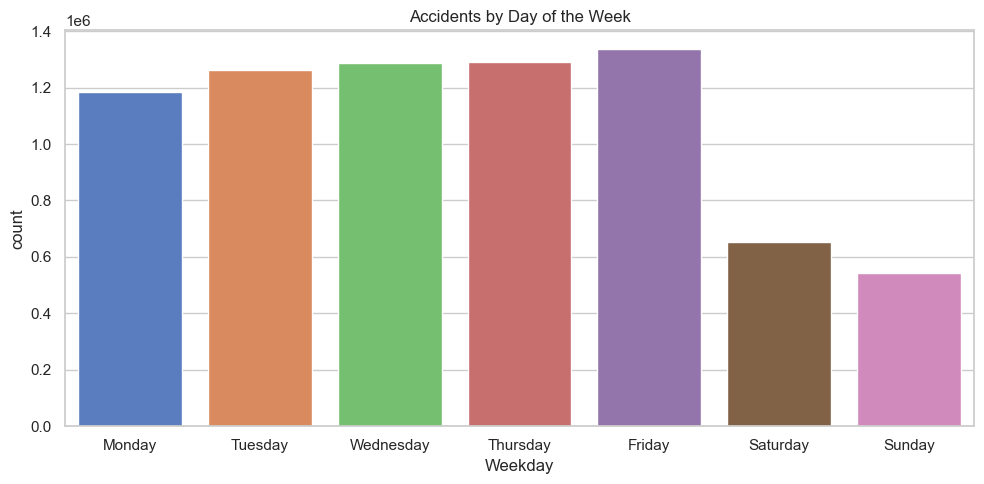

In [6]:
# Accidents by Weekday
plt.figure(figsize=(10, 5))
order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
sns.countplot(data=df, x='Weekday', order=order, palette='muted')
plt.title('Accidents by Day of the Week')
plt.tight_layout()

# Save the figure - modified for Jupyter Notebook environment
file_name = 'accidents_by_weekday.png'
# Simply save in the current working directory instead of using __file__
plt.savefig(file_name, dpi=300, bbox_inches='tight')
plt.show()  # Display the plot after saving

In [7]:
# Sample to speed up map rendering
sample_df = df[['Start_Lat', 'Start_Lng']].dropna().sample(10000)

# Create folium map
map_center = [sample_df['Start_Lat'].mean(), sample_df['Start_Lng'].mean()]
heat_map = folium.Map(location=map_center, zoom_start=5)
HeatMap(data=sample_df[['Start_Lat', 'Start_Lng']].values, radius=8).add_to(heat_map)

# Save map
heat_map.save("accident_hotspots_map.html")
print("✅ Heatmap saved as 'accident_hotspots_map.html'")


✅ Heatmap saved as 'accident_hotspots_map.html'


## 📌 Summary of Findings

- **Afternoon and Evening** see the highest number of accidents.
- **Top Weather Conditions** contributing to accidents:
  - Clear
  - Rain
  - Overcast
  - Fog
- **Weekdays**, especially **Friday**, have more accidents.
- Heatmap shows dense accident zones around **urban and coastal areas**.
